In [1]:
import matplotlib.pyplot as plt
from pycalib.visualisations import plot_binary_reliability_diagram_gaps
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps
from sklearn.preprocessing import OneHotEncoder
import iteround
import numpy as np
import pandas as pd
from scipy.stats import dirichlet

In [2]:
def get_scores(alpha, size, random_state):
    np.random.seed(random_state)
    scores = dirichlet.rvs(alpha, size)
    rounded_scores = np.array(
        [iteround.saferound(s, 1) for s in scores]
    )
    return rounded_scores

In [3]:
n_class = 10

In [4]:
scores_1 = get_scores([5, 1, 1], n_class, 42)
labels_1 = np.random.choice(3, size=(n_class, 1), p=[0.6, 0.2, 0.2])

In [5]:
scores_2 = get_scores([1, 3, 2], n_class, 43)
labels_2 = np.random.choice(3, size=(n_class, 1), p=[0.2, 0.5, 0.3])
random_instance = np.random.choice(n_class)
scores_2[random_instance] = np.around(np.ones(3) / 3, 2)
labels_2[random_instance] = 0

In [6]:
scores_3 = get_scores([1, 2, 3], n_class, 44)
labels_3 = np.random.choice(3, size=(n_class, 1), p=[0.2, 0.3, 0.5])
scores_3[random_instance] = np.around(np.ones(3) / 3, 2)
labels_3[random_instance] = 0

In [7]:
scores = np.vstack([scores_1, scores_2, scores_3])
labels = np.vstack([labels_1, labels_2, labels_3]) + 1

In [8]:
toy = pd.DataFrame(
    np.hstack([scores, labels]),
    columns=['$\hat{p}_1$', '$\hat{p}_2$', '$\hat{p}_3$', '$y$']
).astype(
    {
        '$\hat{p}_1$': float,
        '$\hat{p}_2$': float,
        '$\hat{p}_3$': float,
        '$y$': int
    }
)

In [9]:
sorted_toy = toy.sort_values(
    by=['$y$', '$\hat{p}_1$', '$\hat{p}_2$', '$\hat{p}_3$'],
    ascending=[True, False, False, False]
)

for i in range(3):
    init = 10 * i
    end = 10 * (i + 1)
    print(
        sorted_toy.iloc[init:end].set_index(
            np.arange(init + 1, end + 1)
        ).to_latex(escape=False), 
        '\hfill'
    )

\begin{tabular}{lrrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_2$ &  $\hat{p}_3$ &  $y$ \\
\midrule
1  &         1.00 &         0.00 &         0.00 &    1 \\
2  &         0.90 &         0.10 &         0.00 &    1 \\
3  &         0.80 &         0.10 &         0.10 &    1 \\
4  &         0.70 &         0.10 &         0.20 &    1 \\
5  &         0.60 &         0.30 &         0.10 &    1 \\
6  &         0.40 &         0.10 &         0.50 &    1 \\
7  &         0.33 &         0.33 &         0.33 &    1 \\
8  &         0.33 &         0.33 &         0.33 &    1 \\
9  &         0.20 &         0.40 &         0.40 &    1 \\
10 &         0.10 &         0.50 &         0.40 &    1 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{lrrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_2$ &  $\hat{p}_3$ &  $y$ \\
\midrule
11 &          0.8 &          0.2 &          0.0 &    2 \\
12 &          0.7 &          0.0 &          0.3 &    2 \\
13 &          0.5 &          0.2 &          0.3 &    2 \\
14 &          

In [10]:
for i in range(3):
    init = 10 * i
    end = 10 * (i + 1)
    temp_toy = sorted_toy.iloc[init:end].set_index(np.arange(init + 1, end + 1))
    temp_toy['$y$'] = (temp_toy['$y$'] == 1).astype(int)
    temp_toy['$\hat{p}_0$'] = temp_toy['$\hat{p}_2$'] + temp_toy['$\hat{p}_3$']
    print(
        temp_toy.to_latex(
            escape=False,
            columns=['$\hat{p}_1$', '$\hat{p}_0$', '$y$']
        ), 
        '\hfill'
    )

\begin{tabular}{lrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_0$ &  $y$ \\
\midrule
1  &         1.00 &         0.00 &    1 \\
2  &         0.90 &         0.10 &    1 \\
3  &         0.80 &         0.20 &    1 \\
4  &         0.70 &         0.30 &    1 \\
5  &         0.60 &         0.40 &    1 \\
6  &         0.40 &         0.60 &    1 \\
7  &         0.33 &         0.66 &    1 \\
8  &         0.33 &         0.66 &    1 \\
9  &         0.20 &         0.80 &    1 \\
10 &         0.10 &         0.90 &    1 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{lrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_0$ &  $y$ \\
\midrule
11 &          0.8 &          0.2 &    0 \\
12 &          0.7 &          0.3 &    0 \\
13 &          0.5 &          0.5 &    0 \\
14 &          0.4 &          0.6 &    0 \\
15 &          0.4 &          0.6 &    0 \\
16 &          0.3 &          0.7 &    0 \\
17 &          0.2 &          0.8 &    0 \\
18 &          0.1 &          0.9 &    0 \\
19 &          0.1 &       

In [11]:
def get_bins(df, pos_label, n_bins, bin_edges=None, print_table=True):
    positive_scores = df[f'$\hat{{p}}_{pos_label}$'].values
    positive_labels = (df['$y$'] == pos_label).astype(int).values

#     if bin_edges is None:
#         (counts, bin_edges) = np.histogram(
#             positive_scores, 
#             bins=n_bins,
# #             right=True
#         )

#     bin_idx = np.clip(
#         np.digitize(positive_scores, bin_edges), 
#         0, n_bins
#     )
    
    bins_scores, bins_labels = [], []

#     for b in range(n_bins):
#         bins_scores.append(sorted(positive_scores[bin_idx == b]))
#         bins_labels.append(sorted(positive_labels[bin_idx == b]))
    
    
    bin_size = 1.0/n_bins
    centers = np.linspace(bin_size/2.0, 1.0 - bin_size/2.0, n_bins)
    for i, center in enumerate(centers):
        if i == 0:
            # First bin include lower bound
            bin_indices = np.where(
                np.logical_and(
                    positive_scores >= center - bin_size/2, positive_scores <= center + bin_size/2
                )
            )
            bins_scores.append(sorted(positive_scores[bin_indices]))
            bins_labels.append(sorted(positive_labels[bin_indices]))
        else:
            bin_indices = np.where(
                np.logical_and(
                    positive_scores > center - bin_size/2, positive_scores <= center + bin_size/2
                )
            )
            bins_scores.append(sorted(positive_scores[bin_indices]))
            bins_labels.append(sorted(positive_labels[bin_indices]))
    
    bins_df = pd.DataFrame(
        {
            '$B_i$': [f'$B_{i + 1}$' for i in range(n_bins)],
            '$|B_{i}|$': [
                len(bs) for bs in bins_scores
            ],
            'scores': bins_scores,
            '$\Bar{p}(B_{i})$': [
                '{}/{}'.format(np.around(np.sum(bs), 1), len(bs)) for bs in bins_scores
            ],
            '$\Bar{p}(B_{i}2)$': [
                np.around(np.mean(bs), 2) for bs in bins_scores
            ],
            'labels': bins_labels,
            '$\Bar{y}(B_{i})$': [
                '{}/{}'.format(np.around(np.sum(bl), 1), len(bl)) for bl in bins_labels
            ],
            '$\Bar{y}(B_{i}2)$': [
                np.around(np.mean(bl), 2) for bl in bins_labels
            ]
        }
    )
    
    if print_table:
        print(
            bins_df.drop(['$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$'], axis=1).to_latex(
                escape=False, 
                index=False
            ).replace('[', '').replace(']', '').replace('0.33', '1/3').replace('scores', '').replace('labels', '')
        )
    return bins_df

In [12]:
n_bins = 5
bins_positive = get_bins(sorted_toy, 1, n_bins)

\begin{tabular}{lrllll}
\toprule
 $B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                              & $\Bar{y}(B_{i})$ \\
\midrule
 $B_1$ &         11 &  0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.2, ... &           1.1/11 &  0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1 &             2/11 \\
 $B_2$ &          7 &              0.3, 0.3, 1/3, 1/3, 0.4, 0.4, 0.4 &            2.5/7 &              0, 0, 0, 0, 1, 1, 1 &              3/7 \\
 $B_3$ &          3 &                                    0.5, 0.6, 0.6 &            1.7/3 &                          0, 0, 1 &              1/3 \\
 $B_4$ &          7 &                0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8 &            5.4/7 &              0, 0, 0, 0, 0, 1, 1 &              2/7 \\
 $B_5$ &          2 &                                         0.9, 1.0 &            1.9/2 &                             1, 1 &              2/2 \\
\bottomrule
\end{tabular}



In [13]:
print(
    bins_positive.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('{i}2', '{i}')
)

\begin{tabular}{lrrr}
\toprule
 $B_i$ &  $\Bar{p}(B_{i})$ &  $\Bar{y}(B_{i})$ &  $|B_{i}|$ \\
\midrule
 $B_1$ &               0.10 &               0.18 &         11 \\
 $B_2$ &               0.35 &               0.43 &          7 \\
 $B_3$ &               0.57 &               0.33 &          3 \\
 $B_4$ &               0.77 &               0.29 &          7 \\
 $B_5$ &               0.95 &               1.00 &          2 \\
\bottomrule
\end{tabular}



In [14]:
def calculate_binary_ece(bins):
    abs_diff = (bins['$\Bar{y}(B_{i}2)$'] - bins['$\Bar{p}(B_{i}2)$']).abs()
    mul = abs_diff * bins['$|B_{i}|$']
    numerator = ' + '.join(
        [
            '{} \cdot {}'.format(b, np.around(ad, 2)) for (b, ad) in zip(
                bins['$|B_{i}|$'], abs_diff
            )
        ]
    )
    
    return np.around(mul.sum() / bins['$|B_{i}|$'].sum(), 4), numerator

In [15]:
pos_ece = calculate_binary_ece(bins_positive)
print(pos_ece)

(0.1873, '11 \\cdot 0.08 + 7 \\cdot 0.08 + 3 \\cdot 0.24 + 7 \\cdot 0.48 + 2 \\cdot 0.05')


In [16]:
def get_confidence_df(df):
    conf_values = df.drop('$y$', axis=1).set_index(
        np.arange(1, 31)
    ).max(axis=1)
    
    conf_columns = df.drop('$y$', axis=1).set_index(
        np.arange(1, 31)
    ).idxmax(axis=1).values
    
    predictions = np.array([int(col[-2]) for col in conf_columns])
    correct = (df['$y$'].values == predictions).astype(int)
    
    return pd.DataFrame(
        {
            '$\hat{p}_1$': conf_values,
            '$y$': correct
        }
    )

In [17]:
conf_df = get_confidence_df(sorted_toy)

In [18]:
for i in range(3):
    init = 10 * i
    end = 10 * (i + 1)
    print(
        conf_df.iloc[init:end].set_index(
            np.arange(init + 1, end + 1)
        ).to_latex(header=['confidence', 'correct'], index=False, escape=False), 
        '\hfill'
    )

\begin{tabular}{rr}
\toprule
confidence & correct \\
\midrule
      1.00 &       1 \\
      0.90 &       1 \\
      0.80 &       1 \\
      0.70 &       1 \\
      0.60 &       1 \\
      0.50 &       0 \\
      0.33 &       1 \\
      0.33 &       1 \\
      0.40 &       0 \\
      0.50 &       0 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{rr}
\toprule
confidence & correct \\
\midrule
       0.8 &       0 \\
       0.7 &       0 \\
       0.5 &       0 \\
       0.4 &       0 \\
       0.4 &       0 \\
       0.4 &       1 \\
       0.5 &       0 \\
       0.6 &       1 \\
       0.6 &       0 \\
       0.8 &       0 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{rr}
\toprule
confidence & correct \\
\midrule
       0.8 &       0 \\
       0.8 &       0 \\
       0.8 &       0 \\
       0.6 &       0 \\
       0.7 &       1 \\
       0.6 &       0 \\
       0.4 &       0 \\
       0.6 &       1 \\
       0.7 &       1 \\
       0.7 &       1 \\
\bottomrule
\end{tabular}


In [19]:
bins_conf = get_bins(
    conf_df, 1, n_bins, bin_edges=np.linspace(0, 1, 6)
)

\begin{tabular}{lrllll}
\toprule
 $B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                              & $\Bar{y}(B_{i})$ \\
\midrule
 $B_1$ &          0 &                                                  &            0.0/0 &                                  &            0.0/0 \\
 $B_2$ &          7 &              1/3, 1/3, 0.4, 0.4, 0.4, 0.4, 0.4 &            2.7/7 &              0, 0, 0, 0, 1, 1, 1 &              3/7 \\
 $B_3$ &         10 &  0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, ... &           5.6/10 &     0, 0, 0, 0, 0, 0, 0, 1, 1, 1 &             3/10 \\
 $B_4$ &         11 &  0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, ... &           8.3/11 &  0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 &             5/11 \\
 $B_5$ &          2 &                                         0.9, 1.0 &            1.9/2 &                             1, 1 &              2/2 \\
\bottomrule
\end{tabular}



/home/tmfilho/anaconda2/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tmfilho/anaconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
print(
    bins_conf.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('{i}2', '{i}').replace('NaN', '')
)

\begin{tabular}{lrrr}
\toprule
 $B_i$ &  $\Bar{p}(B_{i})$ &  $\Bar{y}(B_{i})$ &  $|B_{i}|$ \\
\midrule
 $B_1$ &                 &                 &          0 \\
 $B_2$ &               0.38 &               0.43 &          7 \\
 $B_3$ &               0.56 &               0.30 &         10 \\
 $B_4$ &               0.75 &               0.45 &         11 \\
 $B_5$ &               0.95 &               1.00 &          2 \\
\bottomrule
\end{tabular}



In [21]:
print(calculate_binary_ece(bins_conf))

(0.2117, '0 \\cdot nan + 7 \\cdot 0.05 + 10 \\cdot 0.26 + 11 \\cdot 0.3 + 2 \\cdot 0.05')


In [22]:
bins_class_2 = get_bins(sorted_toy, 2, n_bins)

\begin{tabular}{lrllll}
\toprule
 $B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                                          & $\Bar{y}(B_{i})$ \\
\midrule
 $B_1$ &         15 &  0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, ... &           1.5/15 &  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 &             5/15 \\
 $B_2$ &         12 &  0.3, 0.3, 0.3, 0.3, 0.3, 1/3, 1/3, 0.4, 0.4... &           4.2/12 &           0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1 &             4/12 \\
 $B_3$ &          3 &                                    0.5, 0.6, 0.6 &            1.7/3 &                                      0, 0, 1 &              1/3 \\
 $B_4$ &          0 &                                                  &            0.0/0 &                                              &            0.0/0 \\
 $B_5$ &          0 &                                                  &            0.0/0 &                                              &            0.0/0 \\
\bottomrule


In [23]:
bins_class_3 = get_bins(sorted_toy, 3, n_bins)

\begin{tabular}{lrllll}
\toprule
 $B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                              & $\Bar{y}(B_{i})$ \\
\midrule
 $B_1$ &         11 &  0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.2, ... &           1.1/11 &  0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1 &             4/11 \\
 $B_2$ &         11 &  0.3, 0.3, 0.3, 0.3, 1/3, 1/3, 0.4, 0.4, 0.4... &           3.9/11 &  0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1 &             2/11 \\
 $B_3$ &          4 &                               0.5, 0.5, 0.6, 0.6 &            2.2/4 &                       0, 0, 0, 1 &              1/4 \\
 $B_4$ &          4 &                               0.7, 0.7, 0.7, 0.8 &            2.9/4 &                       0, 1, 1, 1 &              3/4 \\
 $B_5$ &          0 &                                                  &            0.0/0 &                                  &            0.0/0 \\
\bottomrule
\end{tabular}



In [24]:
cls2_ece = calculate_binary_ece(bins_class_2)
print(cls2_ece)

(0.147, '15 \\cdot 0.23 + 12 \\cdot 0.02 + 3 \\cdot 0.24 + 0 \\cdot nan + 0 \\cdot nan')


In [25]:
cls3_ece = calculate_binary_ece(bins_class_3)
print(cls3_ece)

(0.2017, '11 \\cdot 0.26 + 11 \\cdot 0.17 + 4 \\cdot 0.3 + 4 \\cdot 0.03 + 0 \\cdot nan')


In [26]:
np.mean([pos_ece[0], cls2_ece[0], cls3_ece[0]])

0.17866666666666667

In [27]:
print(
    bins_class_2.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('_i', '_{i,2}').replace('{i}2', '{i,2}')
)

\begin{tabular}{lrrr}
\toprule
 $B_{i,2}$ &  $\Bar{p}(B_{i,2})$ &  $\Bar{y}(B_{i,2})$ &  $|B_{i}|$ \\
\midrule
 $B_1$ &               0.10 &               0.33 &         15 \\
 $B_2$ &               0.35 &               0.33 &         12 \\
 $B_3$ &               0.57 &               0.33 &          3 \\
 $B_4$ &                NaN &                NaN &          0 \\
 $B_5$ &                NaN &                NaN &          0 \\
\bottomrule
\end{tabular}



In [28]:
print(
    bins_class_3.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('_i', '_{i,3}').replace('{i}2', '{i,3}')
)

\begin{tabular}{lrrr}
\toprule
 $B_{i,3}$ &  $\Bar{p}(B_{i,3})$ &  $\Bar{y}(B_{i,3})$ &  $|B_{i}|$ \\
\midrule
 $B_1$ &               0.10 &               0.36 &         11 \\
 $B_2$ &               0.35 &               0.18 &         11 \\
 $B_3$ &               0.55 &               0.25 &          4 \\
 $B_4$ &               0.72 &               0.75 &          4 \\
 $B_5$ &                NaN &                NaN &          0 \\
\bottomrule
\end{tabular}



In [29]:
ohl = OneHotEncoder(sparse=False).fit_transform(labels)

ohl

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

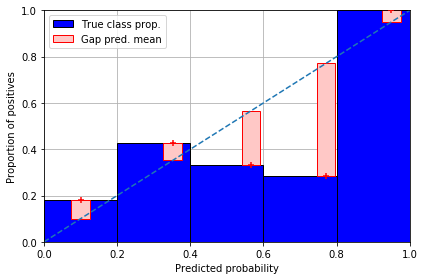

In [30]:
fig = plot_binary_reliability_diagram_gaps(ohl[:,0], scores[:,0], n_bins=5)
# plt.savefig('binary-reliability.png')

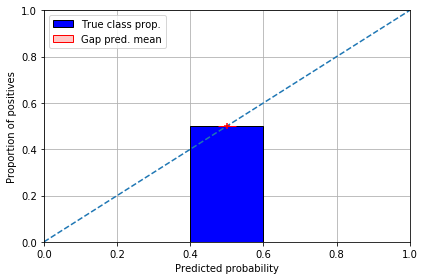

In [31]:
fig2 = plot_binary_reliability_diagram_gaps(
    np.array([1]*5 + [0]*5),
    np.array([0.5]*10),      
    n_bins=5
)
# plt.savefig('perfect-reliability.png')

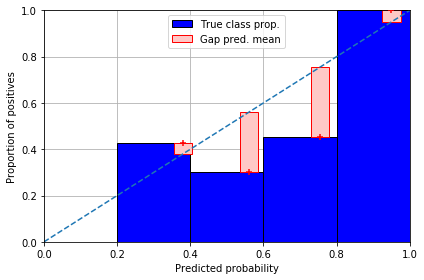

In [32]:
fig3 = plot_binary_reliability_diagram_gaps(conf_df.values[:,1], conf_df.values[:,0], n_bins=5)
# plt.savefig('confidence-reliability.png')

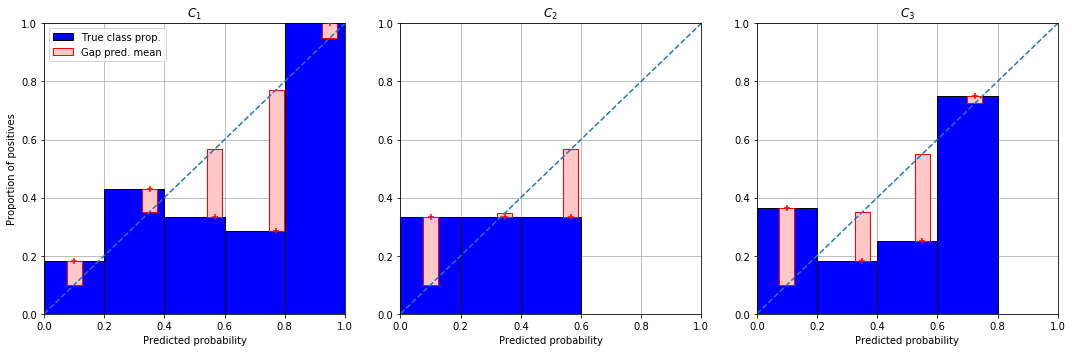

In [33]:
fig4 = plt.figure(figsize=(15,5))
fi4 = plot_multiclass_reliability_diagram_gaps(
    ohl, 
    scores, 
    n_bins=5,
    fig=fig4
)
# plt.savefig('classwise-reliability.png')

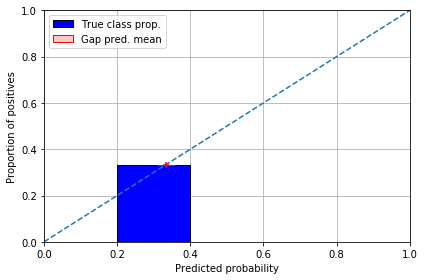

In [34]:
fig2 = plot_binary_reliability_diagram_gaps(
    np.array([1] * 10 + [0] * 20),
    np.array([1/3] * 30),      
    n_bins=5
)

In [35]:
from sklearn.metrics import log_loss


equal_scores = np.array([1/3] * 30)

print(
    log_loss(
        np.array([1] * 10 + [0] * 20),
        equal_scores
    )
)

0.6365141682948127


In [36]:
log_loss(
    np.array([1] * 10 + [0] * 20),
    np.array([0.9] * 10 + [0.1] * 20)
)

0.1053605156578263

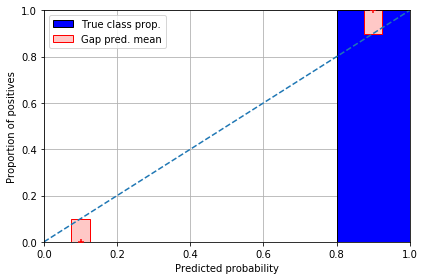

In [37]:
fig3 = plot_binary_reliability_diagram_gaps(
    np.array([1] * 10 + [0] * 20),
    np.array([0.9] * 10 + [0.1] * 20),      
    n_bins=5
)

# Hypothesis test

In [45]:
np.random.seed(42)
S = 1000

values = np.zeros(S)

for s in range(S):
    lab = np.zeros(len(scores))
    for i, score_vec in enumerate(scores):
        if np.sum(score_vec) == 1 :
            lab[i] = np.random.choice(3, p=score_vec) 
        else:
            lab[i] = np.random.choice(3) 
    
    sample = pd.DataFrame(
            np.hstack([scores, lab.reshape(-1, 1)]),
            columns=['$\hat{p}_1$', '$\hat{p}_2$', '$\hat{p}_3$', '$y$']
        ).astype(
            {
                '$\hat{p}_1$': float,
                '$\hat{p}_2$': float,
                '$\hat{p}_3$': float,
                '$y$': int
            }
        )
    bins_1 = get_bins(sample, 1, n_bins, print_table=False)
    ece_1, _ = calculate_binary_ece(bins_1)
    bins_2 = get_bins(sample, 2, n_bins, print_table=False)
    ece_2, _ = calculate_binary_ece(bins_2)
    bins_3 = get_bins(sample, 3, n_bins, print_table=False)
    ece_3, _ = calculate_binary_ece(bins_3)
    
    values[s] = np.mean([ece_1, ece_2, ece_3])
    

(array([ 0.28058361,  0.56116723,  0.        ,  0.56116723,  0.84175084,
         0.28058361,  3.08641975,  1.12233446,  1.9640853 ,  4.20875421,
         2.24466891,  4.76992144,  5.05050505,  4.48933782,  7.29517396,
         7.57575758,  7.29517396,  9.25925926, 12.0650954 ,  6.73400673,
        11.22334456,  8.97867565, 15.71268238, 15.71268238,  9.53984287,
        22.72727273, 15.99326599,  6.17283951, 17.39618406,  5.33108866,
         3.64758698, 17.67676768,  5.33108866,  1.68350168, 13.46801347,
         2.24466891,  3.36700337,  6.73400673,  1.40291807,  2.52525253,
         5.05050505,  0.84175084,  1.40291807,  3.36700337,  1.12233446,
         1.40291807,  0.56116723,  0.        ,  0.        ,  0.28058361]),
 array([0.21466667, 0.21823067, 0.22179467, 0.22535867, 0.22892267,
        0.23248667, 0.23605067, 0.23961467, 0.24317867, 0.24674267,
        0.25030667, 0.25387067, 0.25743467, 0.26099867, 0.26456267,
        0.26812667, 0.27169067, 0.27525467, 0.27881867, 0.282382

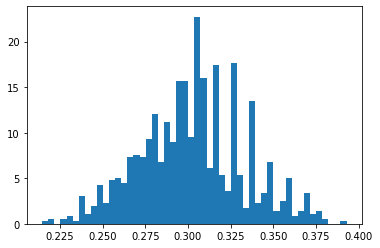

In [46]:
plt.hist(values, bins=50, density=True)

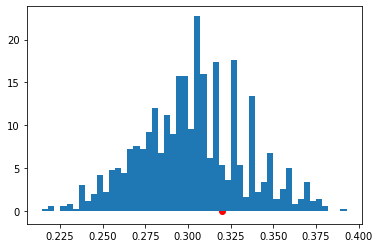

In [47]:
plt.hist(values, bins=50, density=True)
plt.scatter([0.32], [0], c='r')

0.2569999999999996


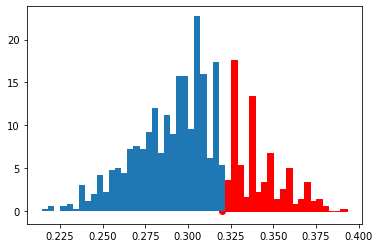

In [54]:
cal_ece = 0.32
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([cal_ece])], [0], c='r')

for i in np.where(boundaries > cal_ece)[0][:-1]:
    patches[i].set_color('r')

print(np.sum(counts[np.where(boundaries > cal_ece)[0][:-1]])/sum(counts))

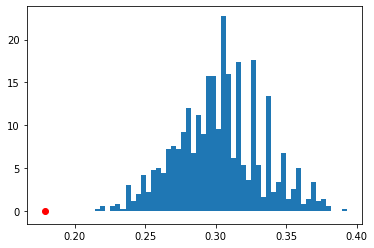

In [57]:
plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([pos_ece[0], cls2_ece[0], cls3_ece[0]])], [0], c='r')

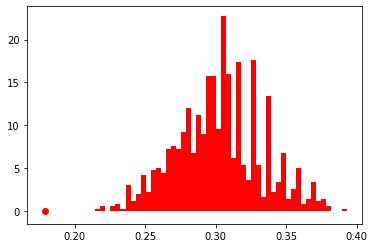

In [58]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True, color='r')
plt.scatter([np.mean([pos_ece[0], cls2_ece[0], cls3_ece[0]])], [0], c='r')

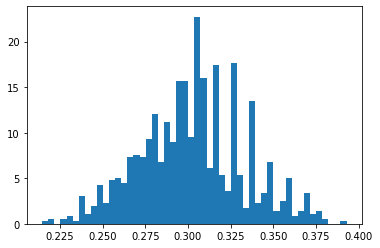

In [50]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)

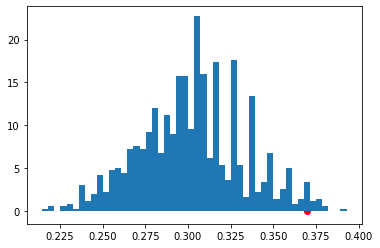

In [55]:
uncal_ece = 0.37

(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([uncal_ece])], [0], c='r')

0.012000000000000049


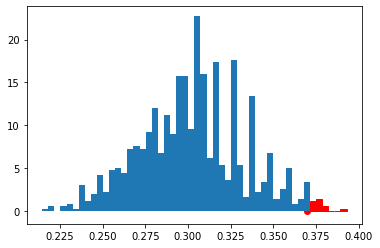

In [56]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([uncal_ece])], [0], c='r')

for i in np.where(boundaries > uncal_ece)[0][:-1]:
    patches[i].set_color('r')

print(np.sum(counts[np.where(boundaries > uncal_ece)[0][:-1]])/sum(counts))

In [ ]:
S = 1000

values = np.zeros(S)
for s in range(S):
    lab = np.zeros(len(scores))
    for i, score_vec in enumerate(scores):
        if np.sum(score_vec) == 1 :
            lab[i] = np.random.choice(3, p=score_vec) 
        else:
            lab[i] = np.random.choice(3) 
   
    values[s] = log_loss(lab, scores, labels=[0, 1, 2])
    

In [ ]:
plt.hist(values, bins=50, density=True)

In [ ]:
scores

In [ ]:
ll = log_loss(labels.flatten() - 1, scores, labels=[0, 1, 2])

In [ ]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([ll], [0], c='r')

for i in np.where(boundaries > ll)[0][:-1]:
    patches[i].set_color('r')

print(np.sum(counts[np.where(boundaries > ll)[0][:-1]])/sum(counts))

# Reliability diagrams with user-provided bins

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels, title=None,
                                         fig=None, ax=None, legend=True):
    '''Plot binary reliability diagram gaps

    Parameters
    ==========
    bin_probs : list
        List of lists representing the probabilities in each bin
    bin_labels : list
        List of lists representing the actual labels in each bin
    n_bins : integer
        Number of bins to divide the scores
    title : string
        Title for the plot
    fig : matplotlib.pyplot.figure
        Plots the axis in the given figure
    ax : matplotlib.pyplot.Axis
        Axis where to draw the plot
    legend : boolean
        If True the function will draw a legend

    Regurns
    =======
    fig : matplotlib.pyplot.figure
        Figure with the reliability diagram
    '''
    if fig is None and ax is None:
        fig = plt.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    if title is not None:
        ax.set_title(title)
    
    n_bins = len(bin_probs)
    
    bin_size = np.zeros(n_bins)
    centers = np.zeros(n_bins)
    lefts = np.zeros(n_bins)
    start = 0
    
    for i in range(n_bins):
        centers[i] = np.mean(bin_probs[i])
        lefts[i] = start
        if i == (n_bins - 1):
            bin_size[i] = 1 - start
        else:
            end = (centers[i] + np.mean(bin_probs[i + 1])) / 2
            bin_size[i] = end - start
            start = end
            
    true_proportion = np.array([np.mean(l) for l in bin_labels])
    pred_mean = np.array([np.mean(probs) for probs in bin_probs])

    not_nan = np.isfinite(true_proportion - centers)
    ax.bar(lefts, true_proportion, width=bin_size, edgecolor="black",
           color="blue", label='True class prop.', align='edge')
    ax.bar(pred_mean[not_nan], (true_proportion - pred_mean)[not_nan],
           bottom=pred_mean[not_nan], width=bin_size/4.0, edgecolor="red",
           color="#ffc8c6",
           label='Gap pred. mean')
    ax.scatter(pred_mean[not_nan], true_proportion[not_nan], color='red',
               marker="+", zorder=10)

    if legend:
        ax.legend()

    ax.plot([0, 1], [0, 1], linestyle="--")
    ax.set_xlim([0, 1])
    ax.set_xlabel('Predicted probability')
    ax.set_ylim([0, 1])
    ax.set_ylabel('Proportion of positives')
    ax.grid(True)
    ax.set_axisbelow(True)
    fig.tight_layout()
    print(bin_size)
    return fig, ax



In [ ]:
bin_probs = [
    [0.1, 0.1],
    [0.4, 0.4],
    [0.7, 0.7, 0.7],
    [0.9]
]



bin_labels = [
    [0, 0],
    [0, 1],
    [0, 1, 1],
    [1]
]

plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels)

In [ ]:
bin_probs = [
    [0.1, 0.2],
    [0.3, 0.4],
    [0.6, 0.7, 0.8],
    [0.9]
]



bin_labels = [
    [0, 0],
    [0, 1],
    [0, 1, 1],
    [1]
]

plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels)

In [ ]:
bin_probs = [
    [0, 0.1],
    [0.2, 0.3],
    [0.4, 0.5],
    [0.6, 0.7, 0.8],
    [0.9, 1]
]

bin_labels = [
    [0, 0],
    [0, 1], 
    [0, 1],
    [1, 0, 1],
    [1, 1]
]

plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels)